# info

1. 各質的変数の値ごとに目的変数の割合を積み上げ棒グラフで確認している
1. 量的変数のヒストグラムを目的変数の値ごとに確認している
1. 量的変数同士の散布図を目的変数の値ごとに色を付けして確認している
1. 量的変数同士の相関係数を確認している

# init

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.style.use('seaborn')

In [27]:
def config_plot(h=10):
    plt.rcParams["font.size"] = 1.5*h
    return (1.62*h, h)

# load

In [2]:
path_doc = "../doc/"
path_img = path_doc + "img/"

In [3]:
path_data = "../data/"
path_raw = path_data + "raw/"
path_mid = path_data + "mid/"

In [130]:
cats = pd.read_csv(path_mid+"cats.csv", index_col=0)
nums = pd.read_csv(path_mid+"nums.csv", index_col=0)
bools = pd.read_csv(path_mid+"bools.csv", index_col=0)

In [131]:
# 家族の人数は質的変数として確認してみる
cats = cats.join(nums[["parch", "sibsp"]])

In [132]:
y = nums[["survived"]].dropna()

# viz

## cat, bool

In [121]:
def plot_cat(data, x, y):
    freq = data.pivot_table(index=x, columns=y, aggfunc="size")
    rate = freq.div(freq.sum(1), axis=0)

    _, axes = plt.subplots(ncols=2, nrows=1, figsize=config_plot(), sharex=True)    
    ax = axes.ravel()

    f1 = freq.plot.bar(stacked=True, figsize=(16,5), ax=ax[0])
    f1.set_ylim(ymax=freq.sum().sum())
    f1.set_ylabel("count")
    f1.legend(loc="upper right")

    f2 = rate.plot.bar(stacked=True, figsize=(16,5), ax=ax[1])
    f2.set_ylim(ymin=0, ymax=1)
    f2.set_ylabel("rate")
    f2.legend(loc="upper right")

    p = path_img+"bi_cat_%s.png"%x
    plt.savefig(p)

    print("###", x)
    print("![](%s)"%p)

In [135]:
data = cats.copy()
data = data.join(y, how="inner")

### embarked
![](../doc/img/bi_cat_embarked.png)
### pclass
![](../doc/img/bi_cat_pclass.png)
### sex
![](../doc/img/bi_cat_sex.png)
### parch
![](../doc/img/bi_cat_parch.png)
### sibsp
![](../doc/img/bi_cat_sibsp.png)


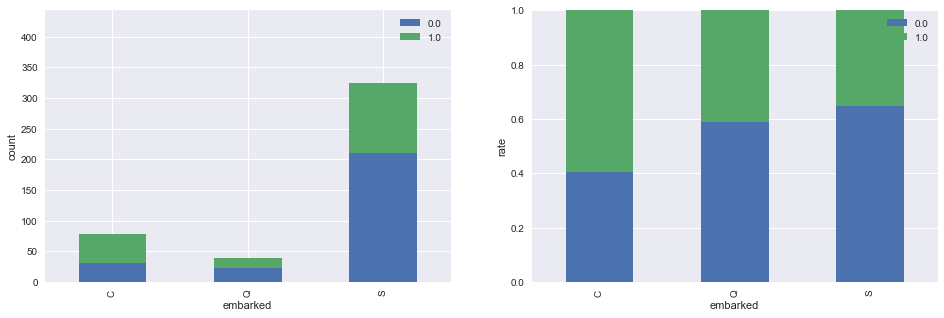

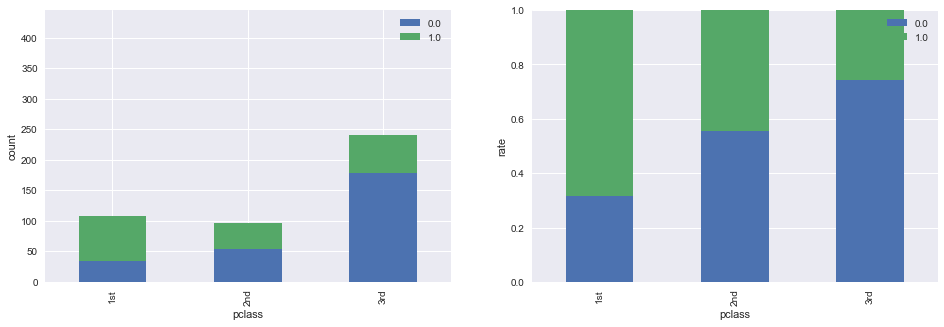

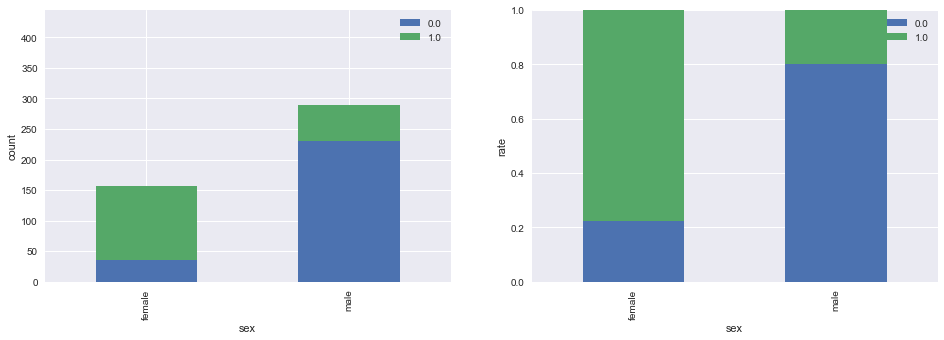

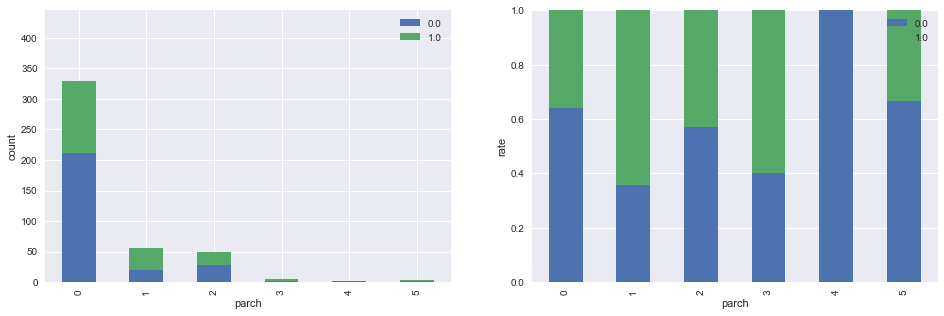

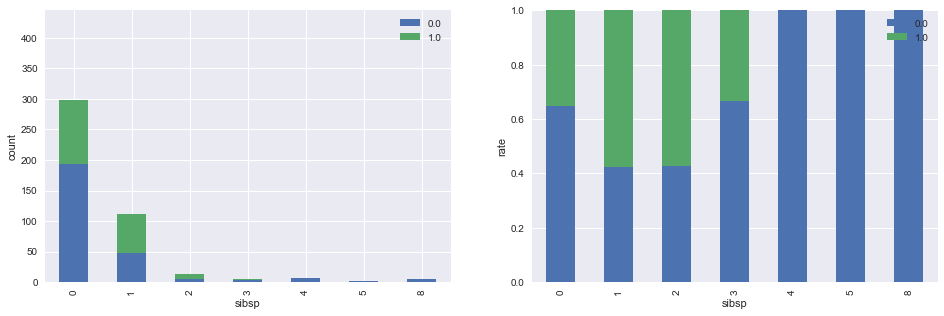

In [136]:
for x in cats:
    plot_cat(data, x, "survived")

# num

In [29]:
def plot_num(data, x, y):
    pass